<h1 align="center"> Classification - Supervised Learning Method</h1> 


## What is Classification?

The task of associating instances (e.g., documents, sentences, words) with pre-defined labels

- Document classification
  - Relevance Classification (binary)
  - Sentiment analysis (binary / multi-class)
  - Topic Classification (multi-class)
- POS tagging
- Named Entity Recognition


## Rule based vs. Machine Learning

- Rule-based: define a list of “if - then” rules. 

  For example:<br\>
  if it mentions “bad” then negative


- Machine Learning: manually label the data and train a machine learning model on it.


### Problems with Rule Based Techniques when Classifying text
- You need many rules to cover all cases
- You need to handle many exceptions
- Defining rules is time consuming and inherently subjective


In [82]:
import warnings
warnings.filterwarnings("ignore")
import codecs, nltk, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import gensim
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg


In [2]:
wordnet_lemmatizer = WordNetLemmatizer()

exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string
def text_embedding(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    article_embedd = []
    
    for word in text:
            try:
                embed_word = small_model[word]
                article_embedd.append(embed_word)
            except KeyError:
                continue

    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    
    # the output is a doc-embedding
    return avg

In [3]:
#load our embeddings
small_model = gensim.models.KeyedVectors.load_word2vec_format('/Users/Ashrakat/Desktop/small-embeddings.txt', binary=False)

## How does supervised machine learning work?

1. You provide the system (lots of) examples of the things you want to classify (we call it training set), in pair: instance - label
2. You train the system (.fit()): it will try to learn how to classify instances in labels in order to minimize a loss function
3. You test on a different dataset (test set), to measure performances



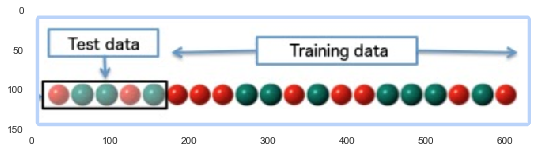

In [123]:
image = mpimg.imread("/Users/Ashrakat/Desktop/testtrain.png")
plt.gcf().set_size_inches(9, 9)
plt.grid(False)
plt.imshow(image)
plt.show()

## Labeling
- Define the specific task (e.g., “Identifying the polarity of Donald Trump’s tweets”)
- Prepare guidelines for labeling consistently
- Having different (at least 3) annotators
- Compute their agreement (to know how difficult it is)

**Bad labels generate the “Garbage-in-Garbage-out” effect!**
- A (properly) labelled dataset is called gold standard (or ground-truth)

In [5]:
dataset = codecs.open("/Users/Ashrakat/Desktop/rt_dataset.tsv", "r", "utf-8").read().strip().split("\n")

article = dataset[4].split("\t")

corpus = []
labels =  []

# we load the first 5000 lines of our dataset (you can try to load it all at home)
for line in dataset[1:5000]:
    # the topic, like "usa" "uk", etc is the label that we want to predict
    label = line.split("\t")[2]
    #here we use our text
    text = line.split("\t")[3]
    # as usual, we use text-embeddings
    text = text_embedding(text)
    
    if len(text)>0:
        corpus.append(text)
        labels.append(label)
print ("ready!")

ready!


In [6]:
#we check labels
labels

['news',
 'shows',
 'uk',
 'usa',
 'sport',
 'news',
 'usa',
 'usa',
 'uk',
 'news',
 'business',
 'news',
 'usa',
 'news',
 'shows',
 'usa',
 'sport',
 'usa',
 'uk',
 'op-edge',
 'news',
 'news',
 'op-edge',
 'business',
 'politics',
 'news',
 'shows',
 'viral',
 'uk',
 'op-edge',
 'in-motion',
 'politics',
 'usa',
 'op-edge',
 'usa',
 'shows',
 'news',
 'viral',
 'news',
 'in-motion',
 'in-motion',
 'op-edge',
 'usa',
 'news',
 'sport',
 'in-motion',
 'viral',
 'uk',
 'in-motion',
 'sport',
 'politics',
 'op-edge',
 'usa',
 'news',
 'uk',
 'op-edge',
 'uk',
 'op-edge',
 'news',
 'news',
 'uk',
 'news',
 'business',
 'news',
 'sport',
 'business',
 'news',
 'politics',
 'usa',
 'usa',
 'news',
 'news',
 'op-edge',
 'news',
 'usa',
 'uk',
 'shows',
 'viral',
 'in-motion',
 'news',
 'sport',
 'news',
 'politics',
 'uk',
 'politics',
 'politics',
 'news',
 'in-motion',
 'usa',
 'usa',
 'in-motion',
 'in-motion',
 'politics',
 'news',
 'news',
 'uk',
 'sport',
 'usa',
 'politics',
 'in-mo

In [128]:
# again, we use np arrays as they are more efficient
X = np.array(corpus)
y = np.array(labels) 

In [129]:
from sklearn.model_selection import train_test_split


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [131]:
X_train.shape
X_test.shape
y_test

array(['usa', 'sport', 'in-motion', 'news', 'business', 'in-motion',
       'viral', 'usa', 'usa', 'sport', 'news', 'news', 'in-motion', 'usa',
       'usa', 'op-edge', 'viral', 'op-edge', 'politics', 'news', 'news',
       'op-edge', 'news', 'uk', 'news', 'uk', 'in-motion', 'in-motion',
       'news', 'news', 'uk', 'business', 'news', 'shows', 'business',
       'viral', 'shows', 'viral', 'sport', 'usa', 'shows', 'usa',
       'in-motion', 'op-edge', 'business', 'business', 'shows', 'news',
       'usa', 'politics', 'news', 'viral', 'news', 'sport', 'news',
       'in-motion', 'usa', 'shows', 'business', 'news', 'usa', 'business',
       'usa', 'news', 'in-motion', 'sport', 'news', 'sport', 'business',
       'usa', 'on-air', 'politics', 'usa', 'sport', 'uk', 'op-edge',
       'usa', 'business', 'news', 'viral', 'business', 'usa', 'uk',
       'news', 'business', 'op-edge', 'in-motion', 'in-motion',
       'business', 'news', 'viral', 'viral', 'uk', 'viral', 'viral',
       'viral', '

In [132]:
X_train

array([[ 0.50593435, -0.14214246,  0.21075813, ...,  0.28854171,
         0.11807109, -0.39990545],
       [ 0.23695058,  0.00393133,  0.17786242, ..., -0.15801285,
         0.11367297, -0.12017402],
       [ 0.3477935 ,  0.16357005,  0.08951366, ...,  0.05318068,
        -0.16911912, -0.00460535],
       ...,
       [ 0.38776755, -0.04430884,  0.03286354, ..., -0.03741226,
        -0.05242585,  0.07869245],
       [ 0.26227764,  0.0802302 ,  0.03673905, ...,  0.47923934,
        -0.15204102, -0.01719074],
       [ 0.48123917,  0.1263599 ,  0.00727561, ..., -0.00743657,
         0.04610327, -0.0933038 ]])

## Logistic Regression

- multi-class: one vs.all - OneVsOneClassifier constructs one classifier per pair of classes. 
- At prediction time, the class which received the most votes is selected.

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
reg_log = LogisticRegression(multi_class="ovr")
reg_log.fit(X_train, y_train)
y_pred_log = reg_log.predict(X_test)

In [135]:
y_pred_log

array(['usa', 'sport', 'viral', 'news', 'uk', 'in-motion', 'news', 'usa',
       'usa', 'sport', 'news', 'news', 'sport', 'usa', 'usa', 'op-edge',
       'viral', 'news', 'politics', 'news', 'news', 'op-edge', 'viral',
       'uk', 'in-motion', 'uk', 'in-motion', 'in-motion', 'viral', 'news',
       'usa', 'business', 'news', 'shows', 'business', 'viral', 'shows',
       'viral', 'sport', 'usa', 'uk', 'usa', 'in-motion', 'op-edge',
       'business', 'politics', 'shows', 'shows', 'usa', 'politics',
       'news', 'viral', 'news', 'sport', 'news', 'in-motion', 'usa',
       'in-motion', 'business', 'news', 'usa', 'business', 'news', 'news',
       'in-motion', 'sport', 'news', 'sport', 'business', 'usa', 'usa',
       'politics', 'usa', 'sport', 'uk', 'op-edge', 'news', 'politics',
       'viral', 'viral', 'business', 'news', 'news', 'news', 'business',
       'op-edge', 'news', 'in-motion', 'business', 'news', 'news',
       'viral', 'uk', 'viral', 'viral', 'viral', 'sport', 'uk', 'spo

## Naive Bayes Classifier

- A probabilistic generative model: outputs are class/label probabilities.
- Conditional independence of features with respect to labels
- Then, pick the label that is most probable.
- Simple, but Used as baseline
- No feature-dependence (“new” and “york” are independent tokens)


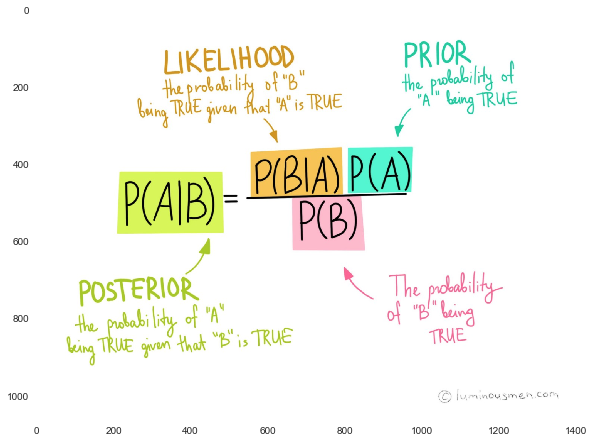

In [136]:
image = mpimg.imread("/Users/Ashrakat/Desktop/NB2.png")
plt.gcf().set_size_inches(10,10)
plt.grid(False)
plt.imshow(image)
plt.show()

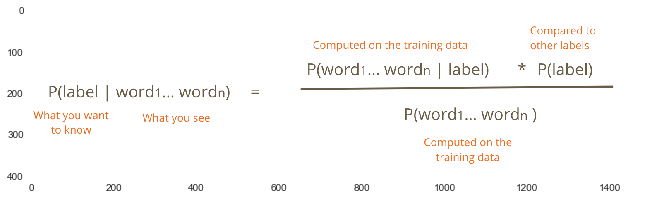

In [137]:
image = mpimg.imread("/Users/Ashrakat/Desktop/NB.png")
plt.gcf().set_size_inches(11,11)
plt.imshow(image)
plt.grid(False)
plt.show()

In [138]:
from sklearn.naive_bayes import GaussianNB

reg_nb = GaussianNB() 
reg_nb.fit(X_train, y_train)
y_pred_nb = reg_nb.predict(X_test)

## Support Vector Machine

1. Non-probabilistic discriminative model. 
2. Project instances in space.
3. Find hyperplane that maximizes margin between closest opposite examples.

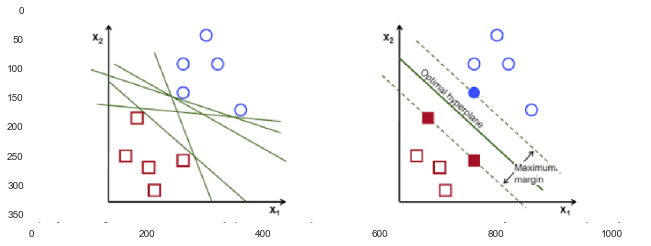

In [139]:
image = mpimg.imread("/Users/Ashrakat/Desktop/SVM.png")
plt.gcf().set_size_inches(11,11)
plt.imshow(image)
plt.grid(False)
plt.show()

In [140]:
from sklearn.svm import SVC

reg_svc = SVC()
reg_svc.fit(X_train, y_train)
y_pred_svm = reg_svc.predict(X_test)



## KNeighborsClassifier

k-NN models work by taking a data point and looking at the ‘k’ closest labeled data points. The data point is then assigned the label of the majority of the ‘k’ closest points

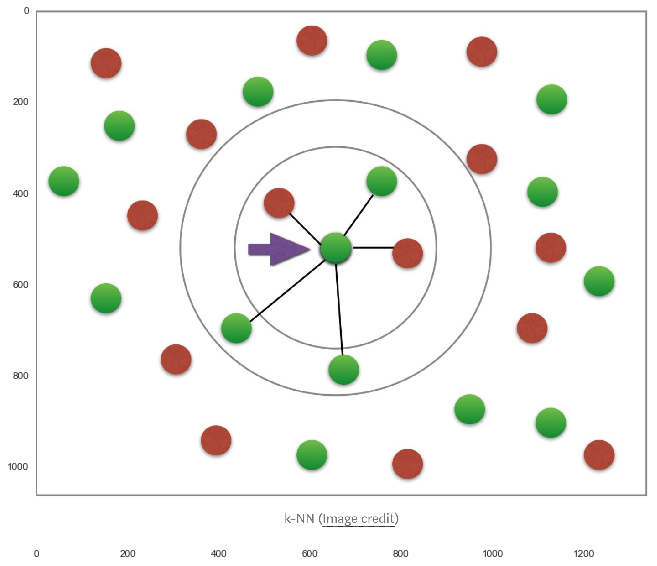

In [141]:
image = mpimg.imread("/Users/Ashrakat/Desktop/knn.png")
plt.gcf().set_size_inches(11,11)
plt.grid(False)
plt.imshow(image)
plt.show()

In [142]:
from sklearn.neighbors import KNeighborsClassifier
reg_knn = KNeighborsClassifier(n_neighbors = 5)
reg_knn.fit(X_train, y_train)
y_pred_kc = reg_knn.predict(X_test)


# Evaluation

**Measures:**
- Precision: number of selected items that are relevant
- Recall: number of relevant items that are selected
- F-1 Score: the harmonic mean of precision and recall


| Gold Standard        | Positive   170        | Negative 30 |
| -------------------- |:-------------:| -----:|
| System Output      | 195 tweets negative (169 corrects) | 5 positive (4 corrects)|

**Example**

- Precision:  fraction of relevant/correctly specified instances among the retrieved instances<br\>
Negative: 87%, Positive: 80% - for negative **(169/195)**

- Recall: number of relevant/correctly specified items that are selected from all instances<br\>
Negative: 99%, Positive: 13% - for negative **169/170**

- F-1 Score: the harmonic mean of precision and recall<br\>
Negative: 93%, Positive: 22%


\begin{equation*}
F1=2*((Percision*Recall)/(Precision+Recall))
\end{equation*}

Calculation for negative values in that example of the F1 score:
\begin{equation*}
F1=2*((99*87)/(99+87) )
\end{equation*}


Note:
    
- A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally)
- A micro-average will aggregate the contributions of all classes to compute the average metric.

In [143]:
from sklearn import metrics
print("Logistic Regression")
print(metrics.classification_report(y_test, y_pred_log))
print("SVM")
print(metrics.classification_report(y_test, y_pred_svm))
print("Naive Bayes")
print(metrics.classification_report(y_test, y_pred_nb))
print("K-Nearest Neighbor")
print(metrics.classification_report(y_test, y_pred_kc))


Logistic Regression
              precision    recall  f1-score   support

    business       0.94      0.88      0.91        93
   in-motion       0.93      0.81      0.86        78
        news       0.68      0.78      0.73       237
      on-air       0.00      0.00      0.00         3
     op-edge       0.67      0.73      0.70       101
    politics       0.76      0.76      0.76        41
       shows       0.90      0.55      0.68        33
       sport       0.88      0.90      0.89        67
          uk       0.87      0.64      0.73       102
         usa       0.72      0.81      0.76       160
       viral       0.53      0.51      0.52        83

   micro avg       0.75      0.75      0.75       998
   macro avg       0.72      0.67      0.69       998
weighted avg       0.76      0.75      0.75       998

SVM
              precision    recall  f1-score   support

    business       0.93      0.81      0.86        93
   in-motion       0.97      0.73      0.83        78


## Confusion-Matrix

- y-axis true label
- x-axis predicted label

In [144]:
unique_label = np.unique([y_test, y_pred])
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred_nb, labels=unique_label), 
    index=['true:{:}'.format(x) for x in unique_label], 
    columns=['pred:{:}'.format(x) for x in unique_label]
)
print(cmtx)

                pred:business  pred:in-motion  pred:news  pred:on-air  \
true:business              77               1          3            0   
true:in-motion              2              61          4            0   
true:news                   5               8        111            0   
true:on-air                 0               2          0            0   
true:op-edge                2               0          5            0   
true:politics               2               0          3            0   
true:shows                  0               1          3            0   
true:sport                  0               0          1            0   
true:uk                     1               2          8            0   
true:usa                    4               1         14            0   
true:viral                  0               0          8            0   

                pred:op-edge  pred:politics  pred:shows  pred:sport  pred:uk  \
true:business              0              4

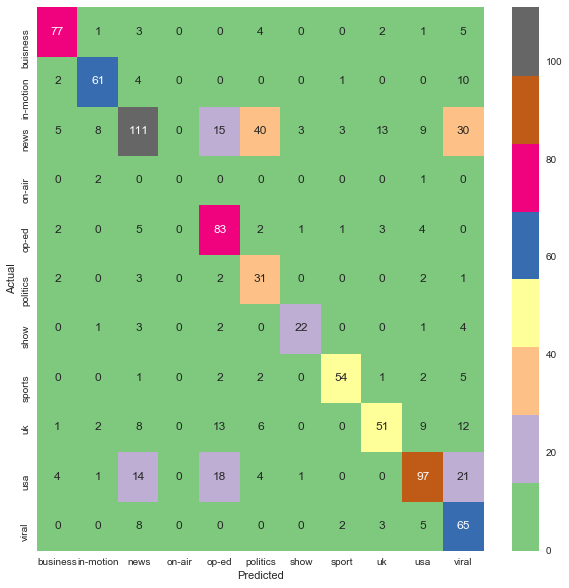

In [145]:
unique_label = np.unique([y_test, y_pred])


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_nb, labels=unique_label)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap="Accent")
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.xaxis.set_ticklabels(['business', 'in-motion',"news","on-air","op-ed","politics","show","sport","uk","usa","viral"])\
; ax.yaxis.set_ticklabels(['viral',"usa","uk","sports","show","politics","op-ed","on-air","news",'in-motion','buisness']);
plt.show()

In [146]:
unique_label

array(['business', 'in-motion', 'news', 'on-air', 'op-edge', 'politics',
       'shows', 'sport', 'uk', 'usa', 'viral'], dtype='<U9')

In [147]:
conf_mat

array([[ 77,   1,   3,   0,   0,   4,   0,   0,   2,   1,   5],
       [  2,  61,   4,   0,   0,   0,   0,   1,   0,   0,  10],
       [  5,   8, 111,   0,  15,  40,   3,   3,  13,   9,  30],
       [  0,   2,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  2,   0,   5,   0,  83,   2,   1,   1,   3,   4,   0],
       [  2,   0,   3,   0,   2,  31,   0,   0,   0,   2,   1],
       [  0,   1,   3,   0,   2,   0,  22,   0,   0,   1,   4],
       [  0,   0,   1,   0,   2,   2,   0,  54,   1,   2,   5],
       [  1,   2,   8,   0,  13,   6,   0,   0,  51,   9,  12],
       [  4,   1,  14,   0,  18,   4,   1,   0,   0,  97,  21],
       [  0,   0,   8,   0,   0,   0,   0,   2,   3,   5,  65]])

**Cross Validation: K-fold Cross-Validation**

Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models

- The data is divided into k folds. 
- The model is trained on k-1 folds with one fold held back for testing. 
- This process gets repeated to ensure each fold of the dataset gets the chance to be the held back set. 
- Once the process is completed, we can summarize the evaluation metric using the mean or/and the standard deviation.

**Does model generalize well with unseen data?** - OVERFITTING

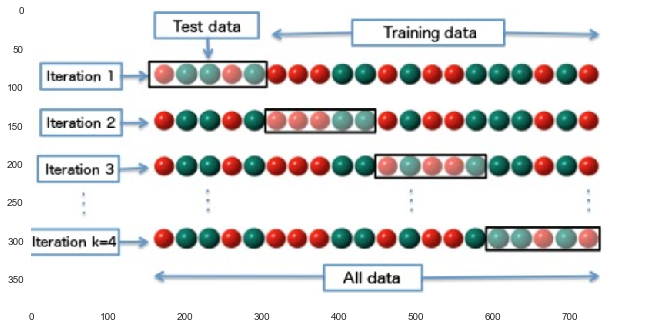

In [148]:
image = mpimg.imread("/Users/Ashrakat/Desktop/eval.png")
plt.gcf().set_size_inches(11,11)
plt.imshow(image)
plt.grid(False)
plt.show()

**Accuracy** is the fraction of predictions our model got right. (Number of correct predictions/Number of otal predictions)

In [149]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=100) # we have 10 folds
model_kfold = LogisticRegression() # we initiate the model, generate cross-validation score
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold) #predictor and response arrays - 10 folds
print("Accuracy Logistic Regression: %.2f%%" % (results_kfold.mean()*100.0))


from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=100) # we have 10 folds
model_kfold = GaussianNB() # we initiate the model, generate cross-validation score
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold) 
print("Accuracy Naive Bayes: %.2f%%" % (results_kfold.mean()*100.0))


from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=100) # we have 10 folds
model_kfold = SVC() # we initiate the model, generate cross-validation score
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold) 
print("Accuracy SVM: %.2f%%" % (results_kfold.mean()*100.0))


kfold = model_selection.KFold(n_splits=10, random_state=100) # we have 10 folds
model_kfold = KNeighborsClassifier() # we initiate the model, generate cross-validation score
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold) 
print("Accuracy K-Nearest Neighbor: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy Logistic Regression: 74.02%
Accuracy Naive Bayes: 64.86%
Accuracy SVM: 66.84%
Accuracy K-Nearest Neighbor: 68.83%


## Problems with Machine Learning
- Labeling is extremely time consuming and tedious
- Trained models are difficult to interpret
- Some algorithms work better on certain tasks (no free lunch theorem)


# Excercises

## Excercise 1: Let's practice some practical things

1. Check embeddings of the word "obama" using **spacy**
2. Check the vector shape of the "obama" embeddings using **spacy**
3. Check out how you can clean text using the spacy pipeline. Extract an article from the rt_data and work with it

## Excercise 2

- Use Amazon Alexa reviews data (on Github)
- Check the labels and the context. Visualize one or some interesting instances in this data.
- Classify them using a logistic regression, NaiveBayes, K-Nearest Neighor, SVM, RandomForest
- Create a confusion matrix for the best performing classifier
- What is the best performing classifier, any theories why? 
- Please get classification report (check what that is in the sklearn package) and print it in pandas
- Please comment on whether you think this is a classification problem rather than a clustering issue? 